Final Capstone Idea Notebook


In [1]:
LOAD_SMALL = True

# use %%script false instead
#!pip install autopep8

# Imports

In [5]:
import io, os, sys, types
from IPython import get_ipython

from IPython.core.interactiveshell import InteractiveShell

In [6]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline


In [8]:
# display 

from IPython.display import display, Image 
from IPython.display import HTML

# Widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
!jupyter nbextension enable --py widgetsnbextension

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# import cufflinks as cf
# import chart_studio
# import statsmodels.api as sm


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Functions


In [11]:


# interact allows makes the function interactive without a needed call to it
#@interact
def w_(n_columns=(5, 30, 5), n_rows=(10,60, 10)):
    ''' sliders to select max rows and columns, not really needed here, but usefull in other notebooks'''
    if n_columns>25:
        pd.set_option('display.max_columns', None)
        c = 'ALL'
    else:
        pd.set_option('display.max_columns', n_columns)
        c = str(n_columns)
    if n_rows > 50:
        pd.set_option('display.max_rows', None)
        r = 'ALL'
    else:
        pd.set_option('display.max_rows', n_rows)
        r = str(n_rows)
    print('Number of columns to display ->', c)
    print('Number of rows to display ->', r)
            



In [12]:
# EDA Functions
def view_describe(df, ret_percent):
    print('SHAPE')
    print(df.shape)
    print('*' * 100)
    print('HEAD')
    print(df.head(10))
    print('*' * 100)
    print('DESCRIBE')
    print(df.describe().round())
    if ret_percent < 1:
        return df.sample(frac = ret_percent, random_state = 22)
    return df

In [13]:
def change_col_space_lower(df):
    '''Function to setup the column names
    Inputs: dataframe
    Outputs: dataframe with changed column names
     - All lower Case
     - no spaces, change to _
     - no dashes, change to _
     - will add a dict imput that will change key words into other word 
     (i.e. employment to emp)
    '''
    df.columns = df.columns.str.replace((' ' and '-'), '_').str.lower()

In [14]:
def missing_data_df(df_):
    df = pd.DataFrame(df_.head(1).T).reset_index()
    df['na_count']   = [df_[col_].isnull().sum() for col_ in df['index']]
    df['na_percent'] = [df_[col_].isnull().sum()/df_.shape[0] for col_ in df['index']] 
    df['count']      = [df_[col_].count() for col_ in df['index']]
    df['unique_count'] = [len(df_[col_].unique()) for col_ in df['index']]
    df.drop(0, axis=1, inplace=True)  
    df.columns = df.columns.str.replace('index', 'col_name')
    return df

# Display Setup

In [ ]:
interact(w_)

interactive(children=(IntSlider(value=15, description='n_columns', max=30, min=5, step=5), IntSlider(value=30,…

<function __main__.w_(n_columns=(5, 30, 5), n_rows=(10, 60, 10))>

# Healthcare Fraud Detection

Healthcare Fraud Detection: https://drive.google.com/file/d/13o2hwoaeNFJ6MIWkFl0WSU06eq32xv4J/view?usp=sharing

First Though - pretty sure this will be a no go for me, but will look

The Liquor Transactions: https://drive.google.com/file/d/1YPTkFOn10u9IlcIjj3xGyxHE5qByo_lH/view?usp=sharing
First Thought - Liquor Transactions - Maybe, I like liquor and transactional data might be good

# Lending Club

Lending Club: https://drive.google.com/file/d/10XHxLtu0Jcuf4hXxB8F3oPdlUlMKYV9g/view?usp=sharing
First Thought - Most likely up my alley with my finance background and my best oppertunites will beee in this line of work

https://www.kaggle.com/wordsforthewise/lending-club

In [16]:
if not LOAD_SMALL:
    accepted = pd.read_csv('data/lending_data/accepted_2007_to_2018Q4.csv')
    rejected = pd.read_csv('data/lending_data/rejected_2007_to_2018Q4.csv')
    accepted_sm = view_describe(accepted, .01)
    rejected_sm = view_describe(rejected, .01)
    

# view of accepted
SHAPE
(2260701, 151)
****************************************************************************************************
HEAD
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   
5  68426831        NaN    11950.0      11950.0          11950.0   36 months   
6  68476668        NaN    20000.0      20000.0          20000.0   36 months   
7  67275481        NaN    20000.0      20000.0          20000.0   36 months   
8  68466926        NaN    10000.0      10000.0          10000.0   36 months   
9  68616873        NaN     8000.0       8000.0           8000.0   36 months   

   int_rate  ...  debt_settlement_flag debt_settlement_flag_date  \
0     13.99  ...                     N                       NaN   
1     11.99  ...                     N                       NaN   
2     10.78  ...                     N                       NaN   
3     14.85  ...                     N                       NaN   
4     22.45  ...                     N                       NaN   
5     13.44  ...                     N                       NaN   
6      9.17  ...                     N                       NaN   
7      8.49  ...                     N                       NaN   
8      6.49  ...                     N                       NaN   
9     11.48  ...                     N                       NaN   

  settlement_status settlement_date settlement_amount settlement_percentage  \
0               NaN             NaN               NaN                   NaN   
1               NaN             NaN               NaN                   NaN   
2               NaN             NaN               NaN                   NaN   
3               NaN             NaN               NaN                   NaN   
4               NaN             NaN               NaN                   NaN   
5               NaN             NaN               NaN                   NaN   
6               NaN             NaN               NaN                   NaN   
7               NaN             NaN               NaN                   NaN   
8               NaN             NaN               NaN                   NaN   
9               NaN             NaN               NaN                   NaN   

   settlement_term  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN  

[10 rows x 151 columns]
****************************************************************************************************
DESCRIBE
       member_id  loan_amnt  funded_amnt  funded_amnt_inv   int_rate  \
count        0.0  2260668.0    2260668.0        2260668.0  2260668.0   
mean         NaN    15047.0      15042.0          15023.0       13.0   
std          NaN     9190.0       9188.0           9192.0        5.0   
min          NaN      500.0        500.0              0.0        5.0   
25%          NaN     8000.0       8000.0           8000.0        9.0   
50%          NaN    12900.0      12875.0          12800.0       13.0   
75%          NaN    20000.0      20000.0          20000.0       16.0   
max          NaN    40000.0      40000.0          40000.0       31.0   

       installment   annual_inc  ...  hardship_dpd  \
count    2260668.0    2260664.0  ...       10917.0   
mean         446.0      77992.0  ...          14.0   
std          267.0     112696.0  ...          10.0   
min            5.0          0.0  ...           0.0   
25%          252.0      46000.0  ...           5.0   
50%          378.0      65000.0  ...          15.0   
75%          593.0      93000.0  ...          22.0   
max         1720.0  110000000.0  ...          37.0   

       orig_projected_additional_accrued_interest  \
count                                      8651.0   
mean                                        455.0   
std                                         375.0   
min                                           2.0   
25%                                         175.0   
50%                                         353.0   
75%                                         620.0   
max                                        2681.0   

       hardship_payoff_balance_amount  hardship_last_payment_amount  \
count                         10917.0                       10917.0   
mean                          11637.0                         194.0   
std                            7626.0                         199.0   
min                              56.0                           0.0   
25%                            5627.0                          44.0   
50%                           10028.0                         133.0   
75%                           16152.0                         284.0   
max                           40306.0                        1408.0   

       settlement_amount  settlement_percentage  settlement_term  
count            34246.0                34246.0          34246.0  
mean              5011.0                   48.0             13.0  
std               3693.0                    7.0              8.0  
min                 44.0                    0.0              0.0  
25%               2208.0                   45.0              6.0  
50%               4146.0                   45.0             14.0  
75%               6850.0                   50.0             18.0  
max              33601.0                  521.0            181.0  

[8 rows x 113 columns]

# view Rejected
SHAPE
(27648741, 9)
****************************************************************************************************
HEAD
   Amount Requested Application Date                        Loan Title  \
0            1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1            1000.0       2007-05-26                Consolidating Debt   
2           11000.0       2007-05-27       Want to consolidate my debt   
3            6000.0       2007-05-27                           waksman   
4            1500.0       2007-05-27                            mdrigo   
5           15000.0       2007-05-27                        Trinfiniti   
6           10000.0       2007-05-27                       NOTIFYi Inc   
7            3900.0       2007-05-27                       For Justin.   
8            3000.0       2007-05-28                            title?   
9            2500.0       2007-05-28                          timgerst   

   Risk_Score Debt-To-Income Ratio Zip Code State Employment Length  \
0       693.0                  10%    481xx    NM           4 years   
1       703.0                  10%    010xx    MA          < 1 year   
2       715.0                  10%    212xx    MD            1 year   
3       698.0               38.64%    017xx    MA          < 1 year   
4       509.0                9.43%    209xx    MD          < 1 year   
5       645.0                   0%    105xx    NY           3 years   
6       693.0                  10%    210xx    MD          < 1 year   
7       700.0                  10%    469xx    IN           2 years   
8       694.0                  10%    808xx    CO           4 years   
9       573.0               11.76%    407xx    KY           4 years   

   Policy Code  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
5          0.0  
6          0.0  
7          0.0  
8          0.0  
9          0.0  
****************************************************************************************************
DESCRIBE
       Amount Requested  Risk_Score  Policy Code
count        27648741.0   9151111.0   27647823.0
mean            13133.0       628.0          0.0
std             15010.0        90.0          0.0
min                 0.0         0.0          0.0
25%              4800.0       591.0          0.0
50%             10000.0       637.0          0.0
75%             20000.0       675.0          0.0
max           1400000.0       990.0          2.0

# Notes

Interest rates by year
Interest rates by amount borrowed
Interest rates US average by month (use this index against charged)
Find low risk rate and high risk rate

dti = debt-to-income

# To Pickle

In [17]:
if not LOAD_SMALL:
    col_accep = missing_data_df(accepted)
    col_accep.to_pickle('data/col_info_accept.pkl')
    col_rejected = missing_data_df(rejected)
    col_rejected.to_pickle('data/col_info_rejected.pkl')
    accepted_sm.to_pickle('data/accepted_sm.pkl')
    rejected_sm.to_pickle('data/rejected_sm.pkl')

# Load Pickle

In [18]:
if LOAD_SMALL:
    col_accepted = pd.read_pickle('data/col_info_accept.pkl')
    col_rejected = pd.read_pickle('data/col_info_rejected.pkl')
    accepted_sm = pd.read_pickle('data/accepted_sm.pkl')

In [20]:
col_accepted

,col_name,na_count,na_percent,count,unique_count
0,id,0,0.000000,2260701,2260701
1,member_id,2260701,1.000000,0,1
2,loan_amnt,33,0.000015,2260668,1573
3,funded_amnt,33,0.000015,2260668,1573
4,funded_amnt_inv,33,0.000015,2260668,10058
...,...,...,...,...,...
146,settlement_status,2226455,0.984852,34246,4
147,settlement_date,2226455,0.984852,34246,91
148,settlement_amount,2226455,0.984852,34246,21942
149,settlement_percentage,2226455,0.984852,34246,2071


# Notes

In [21]:
# drop url, member id, id?, 
# keep hardship flag drop all hardship? not known at start

In [22]:
# predict expected return from start?
# recreate their risk score?
# can I create a warning system when a loan is become in danger, create 
# a system to mediate before it hits the danger area?
# figure out the loss amounts and see how to reduce?

# This could be it????

breaking all the accepted loans into deals (bonds)
Have 4 different investment classes for the deals (groups of loans)
You have the Very Safe Deal
the Medium Risk deal (some risk some return)
the High Risk High Reward Class
The Junk bond status let's roll the dice!

What discount rate would be required to make these marketable?

Problems:
not sure this data gives the date that problems start? might not be useable that way
but can use the start data and make projections about the data from the start

Can also look at their interest rate to calculate based on their starting rates...

High of 30+ percent, pretty sure that is capped in some states, might need to see which states cap their rates for personal loans... usury laws

In [23]:
# and all good things come to an end, and so does this!

https://help.lendingclub.com/hc/en-us/articles/360050574891-Important-Updates-to-the-LendingClub-Notes-Platform

They are ending the notes program Dec 28th of this year!
So, it will no longer be available.

Below is their loan grades and how they classify them into 12 deals... with their percents as of june 30, 2019... 
2,311,305 loans open at that time...

Standard Program Loans Issued from Inception to June 30, 2019 by Grade (A-D)
  Loan Number
Average Interest Rate
5.76%
6.62%
7.16%
7.71%
8.27%
9.24%
10.09%
10.74%
11.49%
12.14%
12.88%
13.65%
14.23%
15.00%
15.91%
16.79%
17.96%
18.69%
19.27%
20.51%
12.32%
Total Amount Issued ($)
1,604,726,000
1,177,770,100
1,204,424,550
1,847,016,500
1,783,969,275
2,021,520,375
2,057,416,150
2,021,726,450
2,317,632,975
2,192,923,625
2,330,449,950
2,105,508,875
2,156,858,725
2,146,073,325
1,985,340,000
1,376,691,650
1,328,534,575
1,113,057,175
966,885,500
854,879,175
34,593,404,950
Grade
of Loans
A1 102,373
A2 81,976
A3 84,893
A4 119,858
A5 122,954
B1 138,975
B2 139,949
B3 142,179
B4 157,899
B5 154,213
C1 158,992
C2 142,853
C3 140,807
C4 137,497
C5 127,834
D1 89,470
D2 86,010
D3 70,829
D4 60,552
D5 51,192
Total 2,311,305
76

In [24]:
col_rejected

,col_name,na_count,na_percent,count,unique_count
0,Amount Requested,0,0.000000e+00,27648741,3640
1,Application Date,0,0.000000e+00,27648741,4238
2,Loan Title,1303,4.712692e-05,27647438,73929
3,Risk_Score,18497630,6.690225e-01,9151111,693
4,Debt-To-Income Ratio,0,0.000000e+00,27648741,126145
5,Zip Code,293,1.059723e-05,27648448,1002
6,State,22,7.956963e-07,27648719,52
7,Employment Length,951355,3.440862e-02,26697386,12
8,Policy Code,918,3.320224e-05,27647823,3


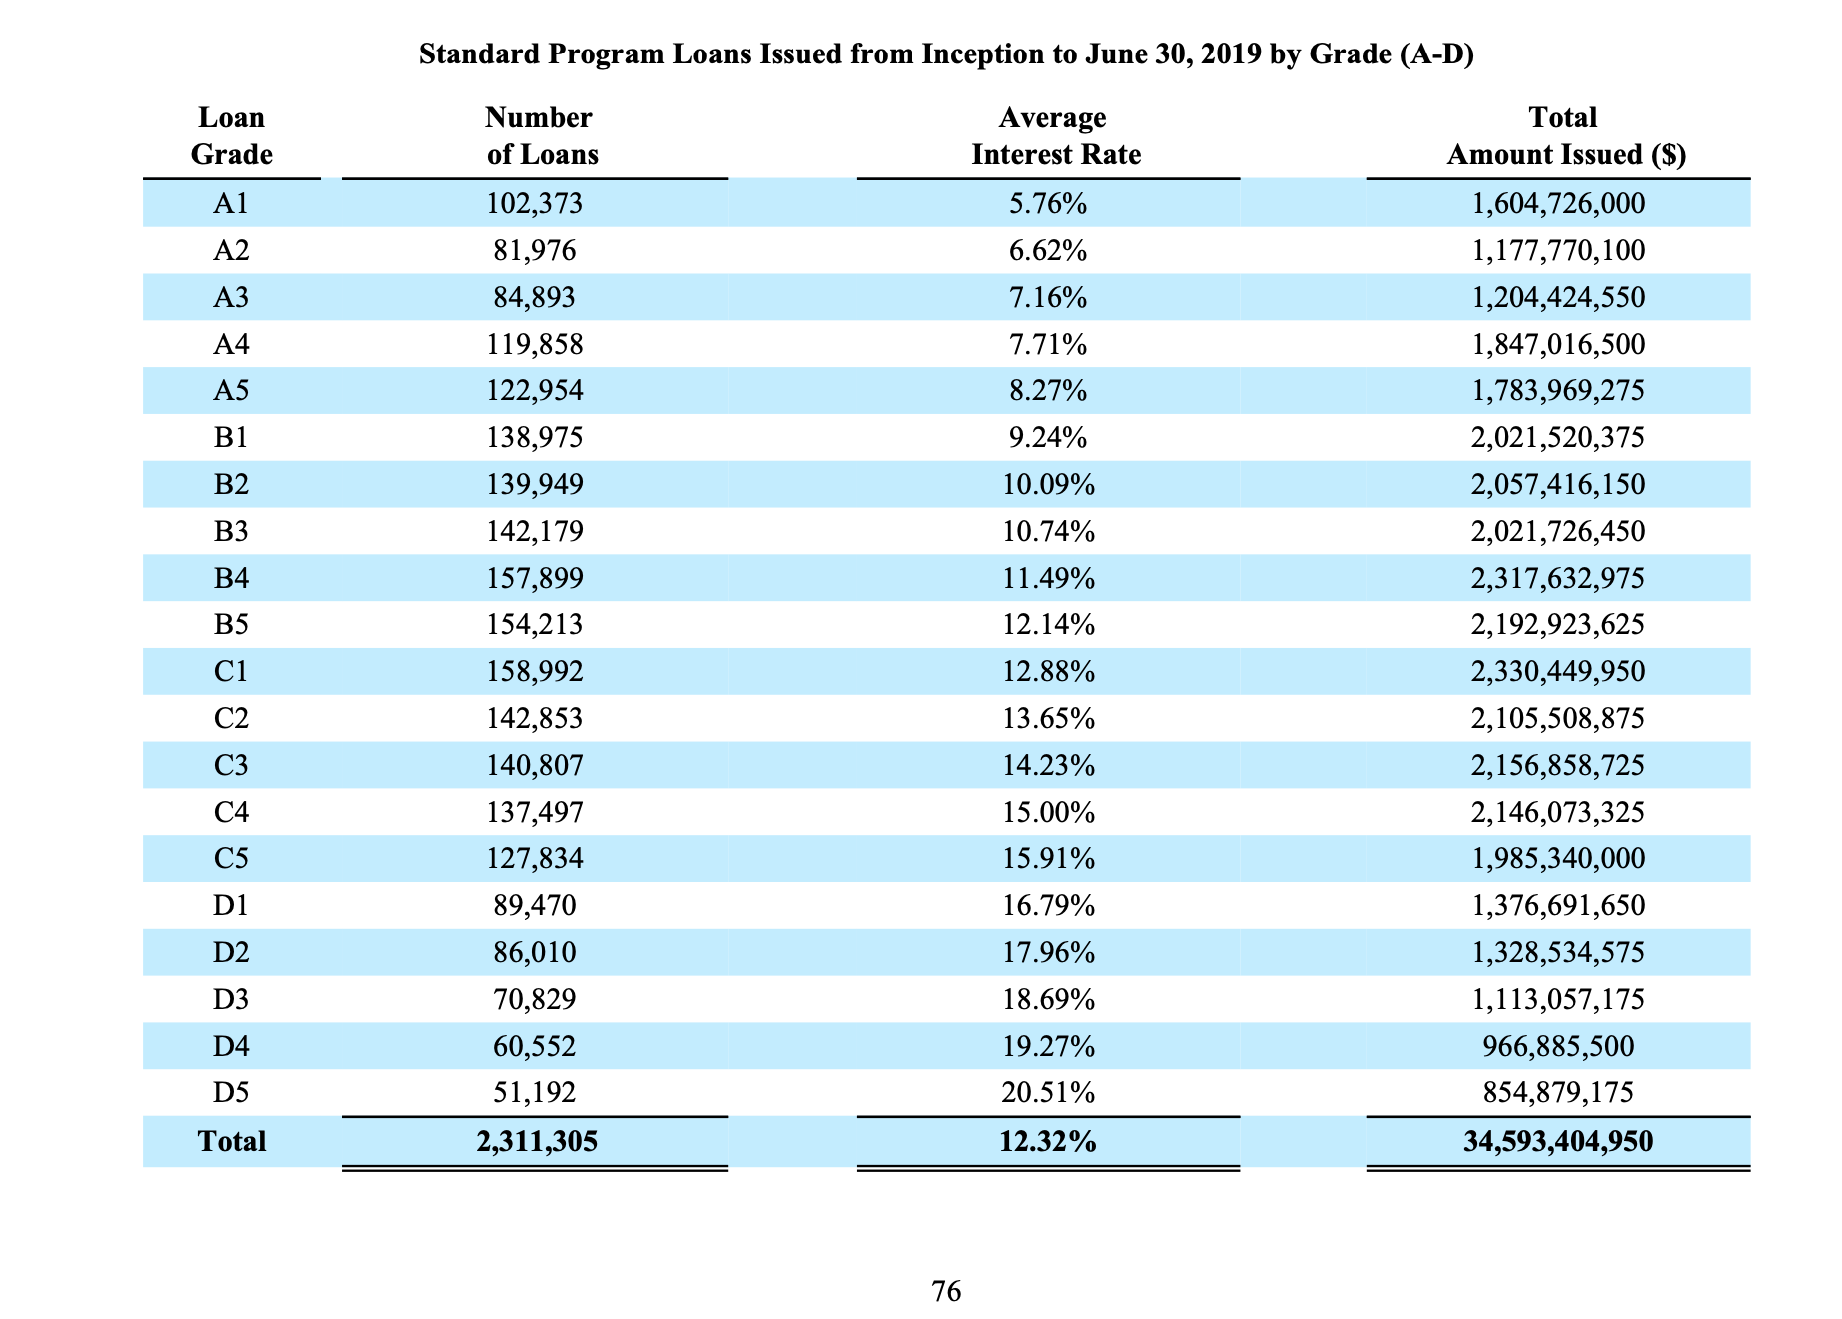

In [38]:
Image('lending_club_deals.png')


In [25]:
# Split app date to month year
# State 52? is that na and DC?
# Risk score, High Bad?
# Loan Title - parse interesting words out? Can figure from columns at start

# Finding columns to eliminate

In [26]:
hardship_col = [col for col in accepted_sm if col.startswith('hard')]

In [27]:
settle_col = [col for col in accepted_sm if col.startswith('settle')]

In [28]:
hardship_col

['hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount']

In [29]:
settle_col

['settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [30]:
columns_to_drop = ['member_id', 'url']

In [31]:
hardship_col[1:]

['hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount']

In [32]:
accepted_sm.drop(hardship_col[1:], axis=1, inplace=True)

In [33]:
accepted_sm.drop(settle_col[1:], axis=1, inplace=True)

In [34]:
accepted_sm.drop(columns_to_drop, axis=1, inplace=True)

In [35]:
accepted_sm.shape

(22607, 134)

In [36]:
accepted_sm.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,deferral_term,payment_plan_start_date,orig_projected_additional_accrued_interest,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status
1553266,132933222,18200.0,18200.0,18200.0,36 months,13.58,618.33,...,NaN,NaN,NaN,Cash,N,NaN,NaN
1830715,5935129,3875.0,3875.0,3875.0,36 months,15.22,134.75,...,NaN,NaN,NaN,Cash,N,NaN,NaN
609600,114787156,12000.0,12000.0,12000.0,36 months,9.93,386.82,...,NaN,NaN,NaN,Cash,N,NaN,NaN
1934689,1147244,5000.0,5000.0,5000.0,36 months,9.76,160.78,...,NaN,NaN,NaN,Cash,N,NaN,NaN
1142977,33561318,34100.0,34100.0,34100.0,60 months,14.99,811.06,...,NaN,NaN,NaN,Cash,N,NaN,NaN


In [37]:
col_accepted['col_name']

0                         id
1                  member_id
2                  loan_amnt
3                funded_amnt
4            funded_amnt_inv
               ...          
146        settlement_status
147          settlement_date
148        settlement_amount
149    settlement_percentage
150          settlement_term
Name: col_name, Length: 151, dtype: object

# Column info

credit report info
delinq_2yrs
earliest_cr_line date
fico_range_high
fico_range_high
inq_last_6mnths
mths_since_last_delinq

loan_amnt - float *
funded_amnt - drop 
funded_amnt_inv - drop 

term - cat (36, 60) *
int_rate - float *
installment (float) *
grade - cat (a-e) *
sub_grade - cat *
emp_title - string keep for now? *
emp_length - cat 0-10 *
home_ownership - cat (rent, own, Mortgage) *
annual_inc float *
verification_status cat (change to bool) *
issue_d date (month year) *

loan_status cat - keep 
pymnt_plan - I think this is used for defaults ?
desc - used to describe pymnt_plan ?

purpose cat consol *
title cat consol *
zip_code cat *
abbr_state cat *
dti * 









In [ ]:
rej_set = set(rejected_sm.columns)

In [ ]:
rej_not_in_accepted = rej_set - set(accepted_sm.columns)

In [ ]:
in_both = rej_set - rej_not_in_accepted

In [ ]:
in_both

In [ ]:
change_col_space_lower(rejected_sm)

In [ ]:
sns.pairplot(rejected_sm)

In [ ]:
accepted_desc_T = accepted.describe().T

In [ ]:
accepted_desc_T

In [ ]:
accepted.type

# 